# US Census Bureau Data Clean

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import re 

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Step 1: Clean the ACS data which is by year, for 2011 - 2020

Specify your file path

In [14]:
path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210 Capstone/Data/census/census_bureau_raw'
os.chdir(path)
# data_files = [i for i in os.listdir(path) if re.search('Data.csv', i)]
data_files = [f'ACSST5Y{i}.S0101-Data.csv' for i in range(2011, 2021)]
data_files

['ACSST5Y2011.S0101-Data.csv',
 'ACSST5Y2012.S0101-Data.csv',
 'ACSST5Y2013.S0101-Data.csv',
 'ACSST5Y2014.S0101-Data.csv',
 'ACSST5Y2015.S0101-Data.csv',
 'ACSST5Y2016.S0101-Data.csv',
 'ACSST5Y2017.S0101-Data.csv',
 'ACSST5Y2018.S0101-Data.csv',
 'ACSST5Y2019.S0101-Data.csv',
 'ACSST5Y2020.S0101-Data.csv']

### Function to clean census data
- Starting 2017, there are many more fields and exising fields change names.
- 2017 and beyond, there is actually a <18 age count field, but because the older tables dont have this, I'm leaving it out. 

In [20]:
def read_and_clean(csv_file):
  df = pd.read_csv(csv_file)
  
  # remove first row which contains field names
  df = df.iloc[1:]

  # add data year in cleaner format
  df['year'] = int(csv_file[7:11])

  # give fields intuitive names
  # starting 2017, the field names change a little
  # pasting actual column names in the comments as a way to check
  if int(csv_file[7:11]) <= 2016:
    df = df.rename(columns = {
      'NAME': 'zip'
      ,'S0101_C01_001E': 'total_population' # Total!!Estimate!!Total population
      ,'S0101_C02_001E': 'total_population_male'
      ,'S0101_C03_001E': 'total_population_female'

      ,'S0101_C01_002E': 'population_0_4'
      ,'S0101_C02_002E': 'population_0_4_male' # Male!!Estimate!!AGE!!Under 5 years
      ,'S0101_C03_002E': 'population_0_4_female' # Female!!Estimate!!AGE!!Under 5 years

      ,'S0101_C01_003E': 'population_5_9' # Total!!Estimate!!AGE!!5 to 9 years
      ,'S0101_C02_003E': 'population_5_9_male'
      ,'S0101_C03_003E': 'population_5_9_female' # Female!!Estimate!!AGE!!5 to 9 years

      ,'S0101_C01_004E': 'population_10_14'
      ,'S0101_C02_004E': 'population_10_14_male' # Male!!Estimate!!AGE!!10 to 14 years
      ,'S0101_C03_004E': 'population_10_14_female' # Female!!Estimate!!AGE!!10 to 14 years

      # it almost looks like the titles should be switched. 
      # but these should be correct
      # ,'S0101_C01_003E': 'population_10_14'
      # ,'S0101_C02_003E': 'population_10_14_male'
      # ,'S0101_C03_003E': 'population_10_14_female'

      # ,'S0101_C01_004E': 'population_5_9'
      # ,'S0101_C02_004E': 'population_5_9_male'
      # ,'S0101_C03_004E': 'population_5_9_female'

      ,'S0101_C01_005E': 'population_15_19'
      ,'S0101_C02_005E': 'population_15_19_male'
      ,'S0101_C03_005E': 'population_15_19_female'
      })
  else:
    df = df.rename(columns = {
      'NAME': 'zip'
      ,'S0101_C01_001E': 'total_population' # Estimate!!Total!!Total population
      ,'S0101_C03_001E': 'total_population_male' # Estimate!!Male!!Total population
      ,'S0101_C05_001E': 'total_population_female'

      ,'S0101_C01_002E': 'population_0_4'
      ,'S0101_C03_002E': 'population_0_4_male' # Estimate!!Male!!Total population!!AGE!!Under 5 years
      ,'S0101_C05_002E': 'population_0_4_female' # Estimate!!Female!!Total population!!AGE!!Under 5 years

      ,'S0101_C01_003E': 'population_5_9'
      ,'S0101_C03_003E': 'population_5_9_male'
      ,'S0101_C05_003E': 'population_5_9_female'

      ,'S0101_C01_004E': 'population_10_14' # Estimate!!Total!!Total population!!AGE!!10 to 14 years
      ,'S0101_C03_004E': 'population_10_14_male' # Estimate!!Male!!Total population!!AGE!!10 to 14 years
      ,'S0101_C05_004E': 'population_10_14_female'

      # running this in case the labels should be swapped. 
      # ,'S0101_C01_003E': 'population_10_14'
      # ,'S0101_C03_003E': 'population_10_14_male'
      # ,'S0101_C05_003E': 'population_10_14_female'

      # ,'S0101_C01_004E': 'population_5_9' # Estimate!!Total!!Total population!!AGE!!10 to 14 years
      # ,'S0101_C03_004E': 'population_5_9_male' # Estimate!!Male!!Total population!!AGE!!10 to 14 years
      # ,'S0101_C05_004E': 'population_5_9_female'

      ,'S0101_C01_005E': 'population_15_19'
      ,'S0101_C03_005E': 'population_15_19_male'  # Estimate!!Male!!Total population!!AGE!!15 to 19 years
      ,'S0101_C05_005E': 'population_15_19_female'
      })

  # select just the fields we need
  df = df[['year', 'zip', 
    'total_population', 'total_population_male', 'total_population_female', 
    'population_0_4', 'population_0_4_male', 'population_0_4_female',
    'population_5_9', 'population_5_9_male', 'population_5_9_female',
    'population_10_14', 'population_10_14_male', 'population_10_14_female',
    'population_15_19', 'population_15_19_male', 'population_15_19_female'
    ]]

  # extract 5-digit zip
  df['zip'] = df['zip'].map(lambda x: int(x[6:]))

  # some columns put "-" instead of 0
  for col in df.columns[2:]:
    df[col] = df[col].map(lambda x: re.sub('-', '0', str(x)))

  # convert measurement columns to float 
  df = df.astype({i:'float' for i in df.columns[2:]})

  # 2016 and prior, the population age band estimates are actually percentages, 
  # so convert them to absolute totals
  if int(csv_file[7:11]) <= 2016:
    for col in [i for i in df.columns if re.search('_male', i)][1:]:
      df[col] = df[col] * df['total_population_male'] / 100 

    for col in [i for i in df.columns if re.search('_female', i)][1:]:
      df[col] = df[col] * df['total_population_female'] / 100 
    
    for col in ['population_0_4', 'population_5_9', 'population_10_14', 'population_15_19']:
      df[col] = df[col] * df['total_population'] / 100

  
  return df

### Run function on all files, and concatenate results

In [21]:
df = pd.concat([read_and_clean(i) for i in data_files], ignore_index=True)
df

<ipython-input-21-1adf43944119>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,610,611,612,613,614,615,616,617,618,619,620,621,622,623,

,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female
0,2011,89010,313.00000,174.00000,139.00000,0.00000,0.00000,0.00000,13.14600,6.96000,5.97700,14.08500,6.96000,6.95000,32.86500,16.00800,16.95800
1,2011,89019,2172.00000,1324.00000,848.00000,158.55600,51.63600,106.84800,0.00000,0.00000,0.00000,117.28800,90.03200,27.98400,69.50400,11.91600,56.81600
2,2011,89060,10691.00000,5342.00000,5349.00000,438.33100,277.78400,160.47000,395.56700,176.28600,219.30900,791.13400,459.41200,326.28900,620.07800,309.83600,310.24200
3,2011,89061,4658.00000,2490.00000,2168.00000,149.05600,97.11000,54.20000,279.48000,146.91000,132.24800,377.29800,271.41000,104.06400,344.69200,166.83000,175.60800
4,2011,89439,1457.00000,797.00000,660.00000,30.59700,0.00000,31.02000,0.00000,0.00000,0.00000,62.65100,31.08300,31.02000,32.05400,31.88000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,2020,96148,679.00000,349.00000,330.00000,20.00000,20.00000,0.00000,36.00000,12.00000,24.00000,35.00000,11.00000,24.00000,0.00000,0.00000,0.00000
17686,2020,96150,30369.00000,15865.00000,14504.00000,1362.00000,672.00000,690.00000,1172.00000,472.00000,700.00000,1364.00000,738.00000,626.00000,1621.00000,871.00000,750.00000
17687,2020,96155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
17688,2020,96161,18782.00000,9504.00000,9278.00000,1045.00000,458.00000,587.00000,1188.00000,617.00000,571.00000,1315.00000,661.00000,654.00000,788.00000,298.00000,490.00000


Total CA population looks accurate

In [22]:
df.groupby('year')['total_population'].sum()

year
2011   36980684.00000
2012   37335403.00000
2013   37669283.00000
2014   38076883.00000
2015   38432707.00000
2016   38664587.00000
2017   38992917.00000
2018   39159540.00000
2019   39295030.00000
2020   39358277.00000
Name: total_population, dtype: float64

In [23]:
df['total_pop_under19'] = df\
  .apply(lambda df: df['population_0_4'] + df['population_5_9'] + df['population_10_14'] + df['population_15_19'], axis=1)

df.groupby('year')['total_pop_under19'].sum()

year
2011   10431986.37200
2012   10415778.59000
2013   10362783.25400
2014   10315085.66800
2015   10257878.36400
2016   10209127.67300
2017   10173841.00000
2018   10121208.00000
2019   10061705.00000
2020    9987232.00000
Name: total_pop_under19, dtype: float64

Plot populations over time.
- It totally looks like the columns might be mislabeled after 2016, for ages 5-9 and 10-14. It looks like they should be swapped. But I've checked many times and it seems these labels correct, there must have just been a large age cohort aging from 9 to 10 in 2016 to 2017. 

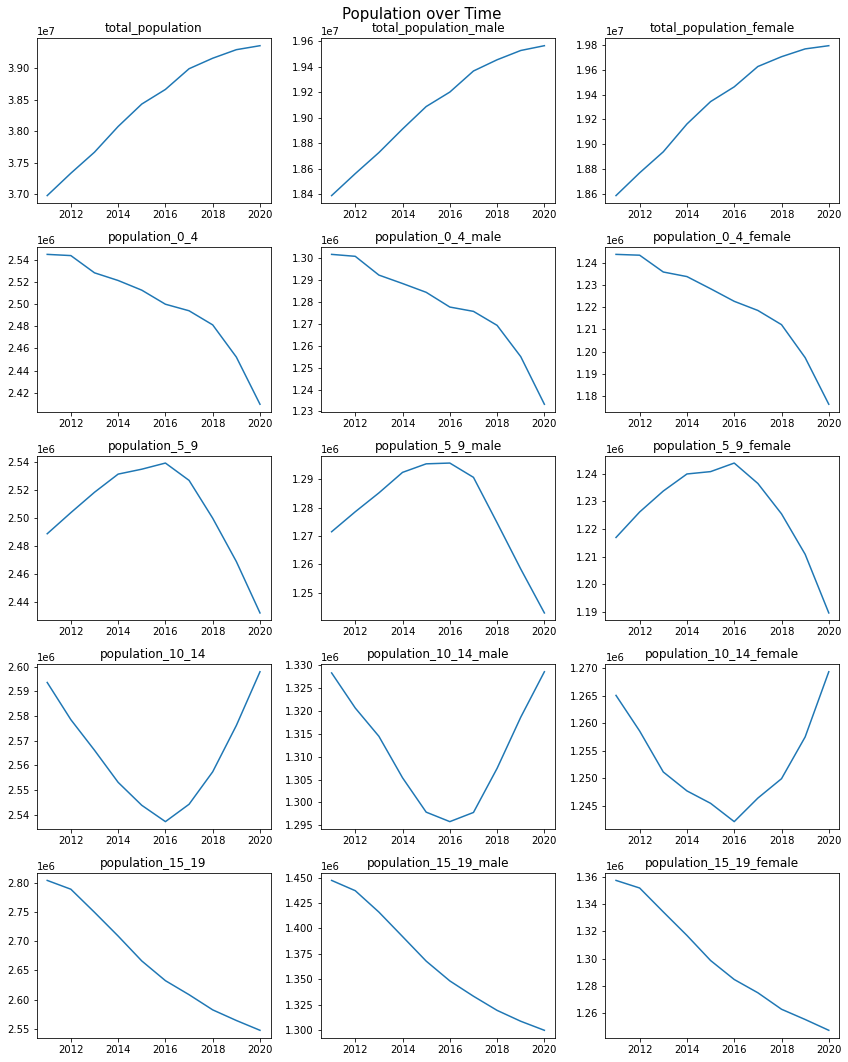

In [24]:
agg_dict = {i:(i, 'sum') for i in df.columns[2:len(df.columns)-1]}
# agg_dict['n']= ('year', 'count')
df_grouped = df.groupby('year').agg(**agg_dict).reset_index()
df_grouped

# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

df_plt = df_grouped
all_vars = df_plt.columns[1:]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = all_vars[col_i]
    ax[i][j].plot(df_plt['year'], df_plt[var])
    
    ax[i][j].set_title(var)
    col_i += 1

fig.suptitle("Population over Time".format(col_i), size=15)
fig.tight_layout()
print("")

Histogram of ages

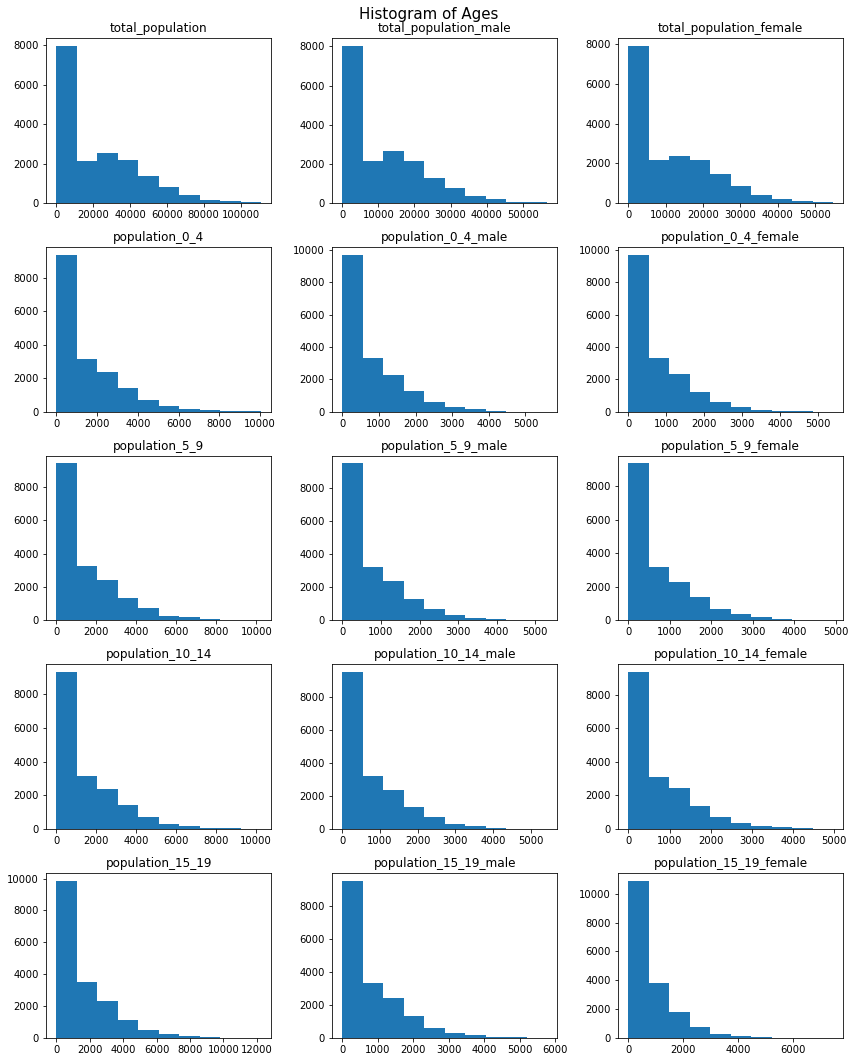

In [474]:
# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

df_plt = df[df.columns[2:]]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = df_plt.columns[col_i]
    ax[i][j].hist(df_plt[var])
    ax[i][j].set_title(var)
    col_i += 1

fig.suptitle("Histogram of Ages".format(col_i), size=15)
fig.tight_layout()
print("")

See min/max zip codes to filter future queries to get only CA zips. Using this in my GCP query to reduce zip code count a bit. 

In [475]:
print(df['zip'].min())
print(df['zip'].max())

89010
97635


## Step 2: Read in decennial census which was downloaded from GCP

This census only has 2000 and 2010. Goals are to...
- Linear interpolate for the in-between years to estimate populations
- Clean to match the format of the previous table so we can stack them

In [25]:
df2 = pd.read_csv('../gcp_data/gcp_census_bureau_decenial.csv')
df2

,zipcode,year,minimum_age,maximum_age,gender,population
0,89011,2010,NaN,NaN,NaN,19550
1,89012,2010,NaN,NaN,NaN,29085
2,89013,2010,NaN,NaN,NaN,285
3,89014,2010,NaN,NaN,NaN,36922
4,89015,2010,NaN,NaN,NaN,38993
...,...,...,...,...,...,...
96970,91701,2000,85.00000,NaN,female,179
96971,95941,2000,85.00000,NaN,female,5
96972,97544,2000,85.00000,NaN,female,13
96973,95128,2000,85.00000,NaN,female,502


Data clean:

In [26]:
# when age/gender fields are NULL, this means it's a total metric. So replace that. 
# want to convert to int first to remove trailing .000
df2['minimum_age'] = df2['minimum_age'].fillna(999).astype(int).astype(object).map(lambda x: 'total' if x==999 else x)
df2['maximum_age'] = df2['maximum_age'].fillna(999).astype(int).astype(object).map(lambda x: 'total' if x==999 else x)
df2['gender'] = df2['gender'].fillna('total')

# some zips are only 3 digit, and have "xx" at the end, just remove these. 
df2 = df2[df2['zipcode'].str.count('XX')==0]
df2['zipcode'] = df2['zipcode'].astype(int)

# create a field that's the age range
df2['age_band'] = df2.apply(lambda df: 'population_' + str(df['minimum_age']) + '_' + str(df['maximum_age']) + '_' + df['gender'], axis=1)

# split out 2000 vs 2010 for linear interpolation
df_2000 = df2[df2['year']==2000][['zipcode', 'population', 'age_band']].rename(columns={'population': 'population_2000'})
df_2010 = df2[df2['year']==2010][['zipcode', 'population', 'age_band']].rename(columns={'population': 'population_2010'})

# linear interpolate
# deciding to keep populations constant at 2010 or 2000 when there isn't a join
# can change this assumption with the arg
def linear_interpolate(df, na_constant=True):
  df = pd.merge(df_2000, df_2010, on=['zipcode', 'age_band'], how='outer')
  df['slope'] = (df['population_2010'] - df['population_2000']) / 10
  
  for i in range(2001, 2010):
    df['population_'+str(i)] = np.round(df['population_2000'] + df['slope'] * (i-2000))
    
    if na_constant:
      df['population_'+str(i)].fillna(df['population_2010'], inplace=True)
      df['population_'+str(i)].fillna(df['population_2000'], inplace=True)
  
  df = df.drop(columns='slope')
  return df 

df2 = linear_interpolate(df2)


# melt years into 1 col
df2 = pd.melt(df2, 
	id_vars= ["zipcode", "age_band"], 
	var_name="pop_year", 
	value_name="population", col_level=None)

df2['year'] = df2['pop_year'].map(lambda x: int(x[-4:]))
df2 = df2.drop(columns='pop_year')


# now cast out the age_bands
df2 = df2.pivot(
  index = ['zipcode', 'year'], 
  columns = ['age_band'], 
  values = 'population'
).reset_index()

# rename to match the other census table
df2 = df2.rename(columns={
  'zipcode': 'zip'
  ,'population_total_total_male': 'total_population_male'
  ,'population_total_total_female': 'total_population_female'
  ,'population_total_total_total': 'total_population'
  })

# combine some age bands
df2['population_15_19_female'] = df2['population_15_17_female'] + df2['population_18_19_female']
df2['population_15_19_male'] = df2['population_15_17_male'] + df2['population_18_19_male']

# get gender combined fields
df2['population_0_4'] = df2['population_0_4_male'] + df2['population_0_4_female']
df2['population_5_9'] = df2['population_5_9_male'] + df2['population_5_9_female']
df2['population_10_14'] = df2['population_10_14_male'] + df2['population_10_14_female']
df2['population_15_19'] = df2['population_15_19_male'] + df2['population_15_19_female']

# get total pop <19 field
df2['total_pop_under19'] = df2['population_0_4'] + df2['population_5_9'] + df2['population_10_14'] + df2['population_15_19']

# select and rearrange
df2 = df2[df.columns]

# filter for only CA zips 
df2 = df2[df2['zip'].isin(set(df.zip))]

df2

age_band,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19
66,2000,89010,345.00000,188.00000,157.00000,11.00000,7.00000,4.00000,22.00000,16.00000,6.00000,24.00000,10.00000,14.00000,24.00000,18.00000,6.00000,81.00000
67,2001,89010,345.00000,188.00000,157.00000,11.00000,7.00000,4.00000,22.00000,16.00000,6.00000,24.00000,10.00000,14.00000,24.00000,18.00000,6.00000,81.00000
68,2002,89010,345.00000,188.00000,157.00000,11.00000,7.00000,4.00000,22.00000,16.00000,6.00000,24.00000,10.00000,14.00000,24.00000,18.00000,6.00000,81.00000
69,2003,89010,345.00000,188.00000,157.00000,11.00000,7.00000,4.00000,22.00000,16.00000,6.00000,24.00000,10.00000,14.00000,24.00000,18.00000,6.00000,81.00000
70,2004,89010,345.00000,188.00000,157.00000,11.00000,7.00000,4.00000,22.00000,16.00000,6.00000,24.00000,10.00000,14.00000,24.00000,18.00000,6.00000,81.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26142,2006,97635,313.00000,156.00000,156.00000,11.00000,6.00000,5.00000,10.00000,5.00000,5.00000,20.00000,8.00000,12.00000,14.00000,7.00000,7.00000,55.00000
26143,2007,97635,307.00000,153.00000,153.00000,10.00000,6.00000,4.00000,9.00000,4.00000,5.00000,20.00000,8.00000,12.00000,12.00000,6.00000,6.00000,51.00000
26144,2008,97635,301.00000,151.00000,150.00000,10.00000,6.00000,4.00000,8.00000,4.00000,4.00000,18.00000,7.00000,11.00000,10.00000,6.00000,4.00000,46.00000
26145,2009,97635,295.00000,148.00000,147.00000,9.00000,6.00000,3.00000,7.00000,3.00000,4.00000,17.00000,6.00000,11.00000,8.00000,5.00000,3.00000,41.00000


## Stack 2 census files

In [27]:
df3 = pd.concat([df, df2], ignore_index=True)
df3

,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19
0,2011,89010,313.00000,174.00000,139.00000,0.00000,0.00000,0.00000,13.14600,6.96000,5.97700,14.08500,6.96000,6.95000,32.86500,16.00800,16.95800,60.09600
1,2011,89019,2172.00000,1324.00000,848.00000,158.55600,51.63600,106.84800,0.00000,0.00000,0.00000,117.28800,90.03200,27.98400,69.50400,11.91600,56.81600,345.34800
2,2011,89060,10691.00000,5342.00000,5349.00000,438.33100,277.78400,160.47000,395.56700,176.28600,219.30900,791.13400,459.41200,326.28900,620.07800,309.83600,310.24200,2245.11000
3,2011,89061,4658.00000,2490.00000,2168.00000,149.05600,97.11000,54.20000,279.48000,146.91000,132.24800,377.29800,271.41000,104.06400,344.69200,166.83000,175.60800,1150.52600
4,2011,89439,1457.00000,797.00000,660.00000,30.59700,0.00000,31.02000,0.00000,0.00000,0.00000,62.65100,31.08300,31.02000,32.05400,31.88000,0.00000,125.30200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37144,2006,97635,313.00000,156.00000,156.00000,11.00000,6.00000,5.00000,10.00000,5.00000,5.00000,20.00000,8.00000,12.00000,14.00000,7.00000,7.00000,55.00000
37145,2007,97635,307.00000,153.00000,153.00000,10.00000,6.00000,4.00000,9.00000,4.00000,5.00000,20.00000,8.00000,12.00000,12.00000,6.00000,6.00000,51.00000
37146,2008,97635,301.00000,151.00000,150.00000,10.00000,6.00000,4.00000,8.00000,4.00000,4.00000,18.00000,7.00000,11.00000,10.00000,6.00000,4.00000,46.00000
37147,2009,97635,295.00000,148.00000,147.00000,9.00000,6.00000,3.00000,7.00000,3.00000,4.00000,17.00000,6.00000,11.00000,8.00000,5.00000,3.00000,41.00000


Plot all populations over time
- Explanation: If 2010 has zip code data, but 2000 doesn't have it, just hold the 2010 population flat for 2001-2009. So that's why there's that jump from 2000 from 2001. 

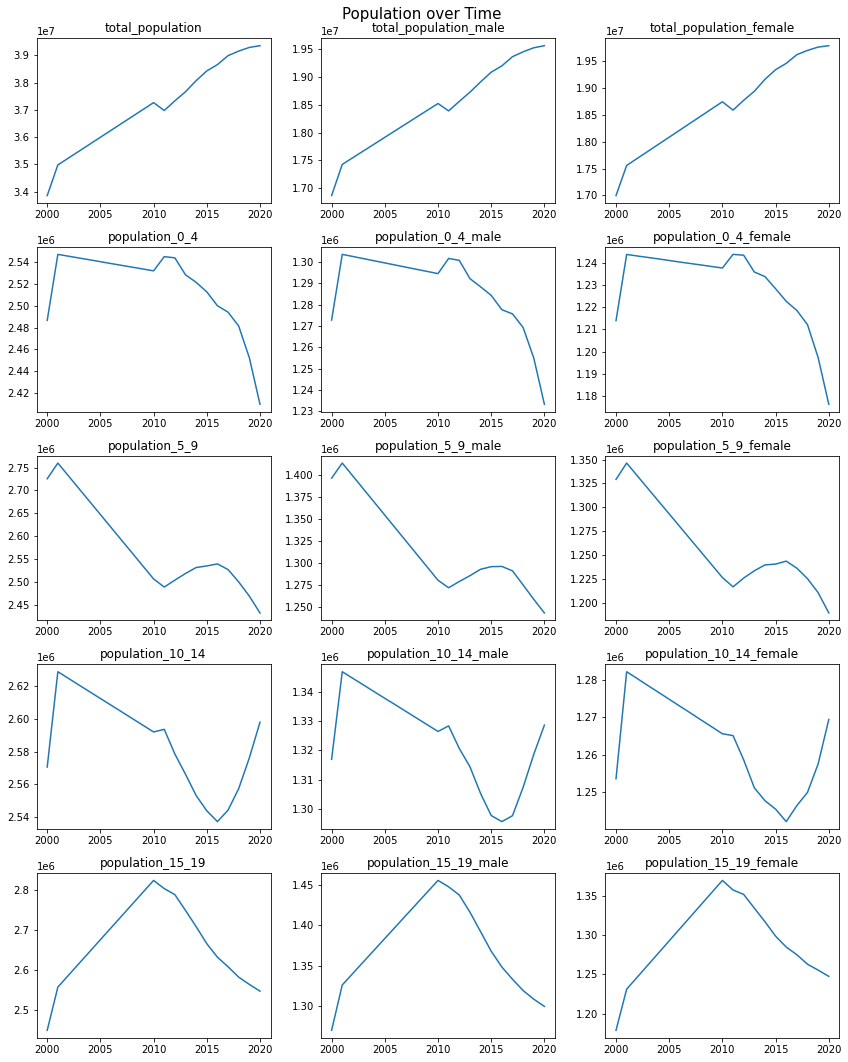

In [28]:
agg_dict = {i:(i, 'sum') for i in df3.columns[2:len(df.columns)-1]}
df_grouped = df3.groupby('year').agg(**agg_dict).reset_index()
df_grouped

# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

df_plt = df_grouped
all_vars = df_plt.columns[1:]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = all_vars[col_i]
    ax[i][j].plot(df_plt['year'], df_plt[var])
    
    ax[i][j].set_title(var)
    col_i += 1

fig.suptitle("Population over Time".format(col_i), size=15)
fig.tight_layout()
print("")

### Write file to disk

In [29]:
!ls /Users/tj/trevorj\@berkeley.edu\ -\ Google Drive/My Drive/Classes/W210_capstone/W210\ Capstone/Data

ls: /Users/tj/trevorj@berkeley.edu - Google: No such file or directory
ls: Drive/Classes/W210_capstone/W210 Capstone/Data: No such file or directory
ls: Drive/My: No such file or directory


In [33]:
out_path = '../census_bureau_clean'
df3.to_csv(os.path.join(out_path, 'census_bureau.csv'), index=False)